In [ ]:
# ! pip uninstall matplotlib

In [ ]:
# ! pip install matplotlib

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")
import warnings
warnings.filterwarnings("ignore")

Setup Complete


In [ ]:
df = pd.read_csv('Tokyo 2021 dataset.csv')

In [ ]:
df

,Rank,Team/NOC,Gold Medal,Silver Medal,Bronze Medal,Total,Rank by Total,NOCCode
0,1,United States of America,39,41,33,113,1,USA
1,2,People's Republic of China,38,32,18,88,2,CHN
2,3,Japan,27,14,17,58,5,JPN
3,4,Great Britain,22,21,22,65,4,GBR
4,5,ROC,20,28,23,71,3,ROC
...,...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77,GHA
89,86,Grenada,0,0,1,1,77,GRN
90,86,Kuwait,0,0,1,1,77,KUW
91,86,Republic of Moldova,0,0,1,1,77,MDA


<AxesSubplot:xlabel='Rank', ylabel='Rank by Total'>

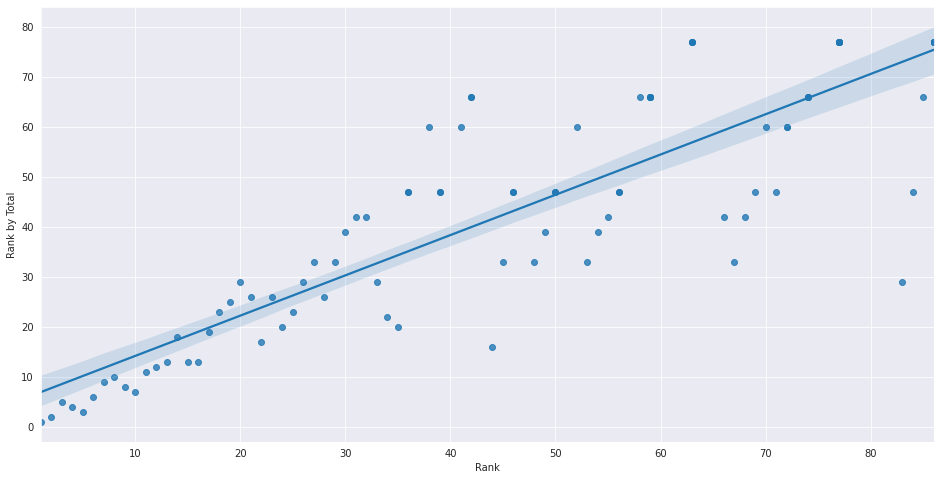

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (16,8))
sns.regplot(x = df.Rank, y= df['Rank by Total'])

<Figure size 1152x576 with 0 Axes>

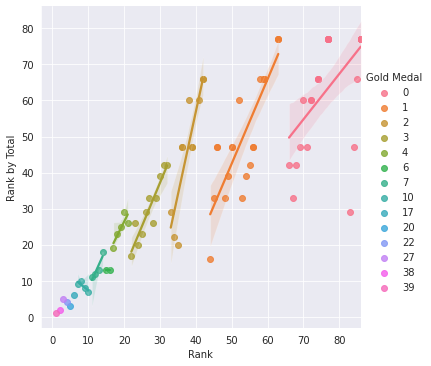

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (16,8))
sns.lmplot(x = "Rank", y = "Rank by Total", hue = "Gold Medal", data = df)

# Rank is determined by the Gold Medal counts (Global Scoring)

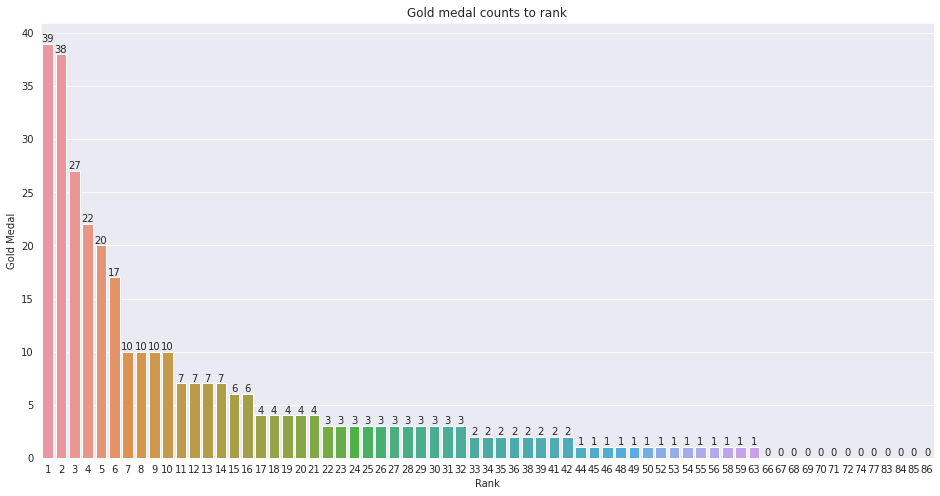

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (16,8))
ax = sns.barplot(x = df['Rank'],y = df['Gold Medal'])
ax.bar_label(ax.containers[0])
plt.title('Gold medal counts to rank')
plt.show()

In [ ]:
df

,Rank,Team/NOC,Gold Medal,Silver Medal,Bronze Medal,Total,Rank by Total,NOCCode
0,1,United States of America,39,41,33,113,1,USA
1,2,People's Republic of China,38,32,18,88,2,CHN
2,3,Japan,27,14,17,58,5,JPN
3,4,Great Britain,22,21,22,65,4,GBR
4,5,ROC,20,28,23,71,3,ROC
...,...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77,GHA
89,86,Grenada,0,0,1,1,77,GRN
90,86,Kuwait,0,0,1,1,77,KUW
91,86,Republic of Moldova,0,0,1,1,77,MDA


# Rank by Total is determined by Total Medal accumulated (US Scoring)

In [ ]:
df_total = df.sort_values(['Rank by Total'])

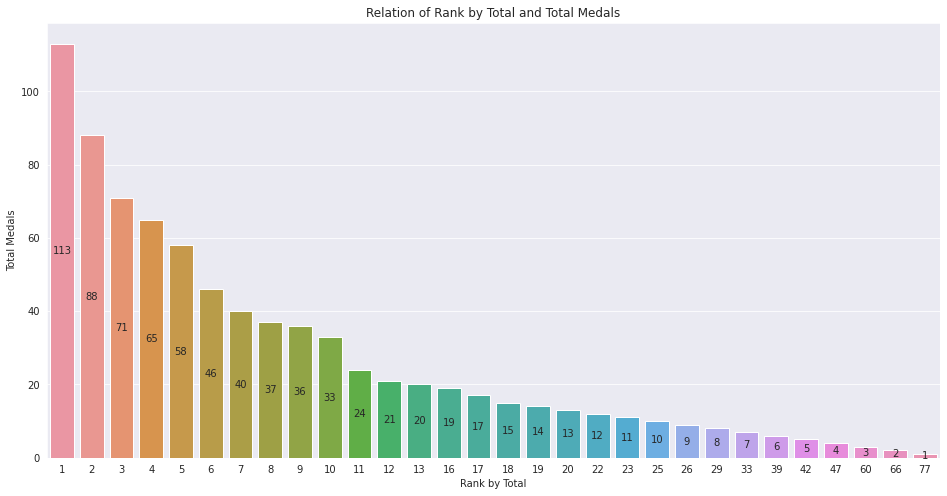

In [ ]:
sns.set_style('darkgrid')
# sns.set_context({"figure.figsize": (24, 10)})
plt.figure(figsize = (16,8))
# ax = sns.barplot(x = 'Rank by Total',y = 'Total', data = df)
ax = sns.barplot(x = 'Rank by Total',y = 'Total', data = df_total)
ax.bar_label(ax.containers[0], label_type = 'center')
ax.set_title('Relation of Rank by Total and Total Medals')
ax.set_ylabel('Total Medals')
plt.show()

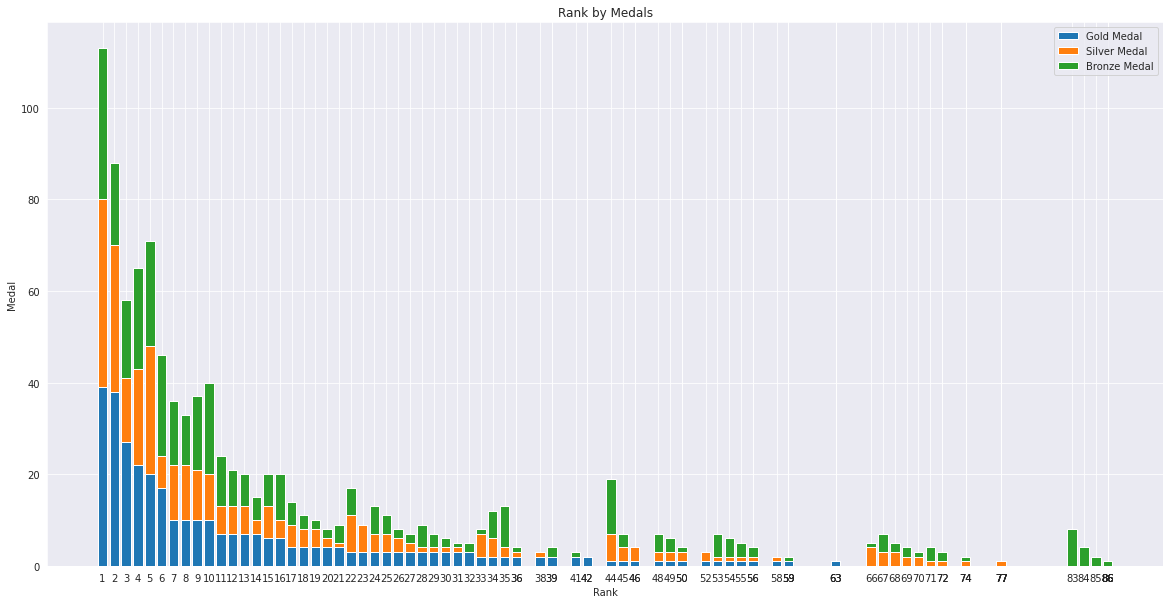

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
sns.set_style('darkgrid')
p1 = ax.bar(df['Rank'], df['Gold Medal'], label='Gold Medal')
p2 = ax.bar(df['Rank'], df['Silver Medal'],bottom=df['Gold Medal'], label='Silver Medal')
p3 = ax.bar(df['Rank'], df['Bronze Medal'],bottom=df['Gold Medal'] + df['Silver Medal'], label='Bronze Medal')

ax.set_ylabel('Medal')
ax.set_xlabel('Rank')

ax.set_xticks(df['Rank'])
ax.legend()

ax.set_title('Rank by Medals')
# ax.bar_label(p1, label_type='center')
# ax.bar_label(p2, label_type='center')
# ax.bar_label(p3, label_type='center')
plt.show()

The rank is determined by this rule:
1. Gold Medal counts, if it is the same then
2. Silver Medal counts, if it is the same then
3. Bronze Medal counts, if it is still the same then they will have same rank

In [ ]:
top_10 = df.iloc[:10]
top_10_total = df_total.iloc[:10]

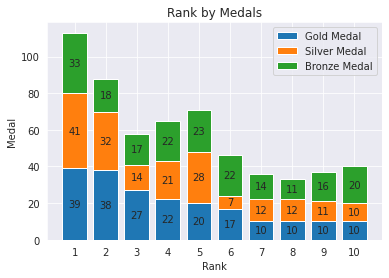

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))
sns.set_style('darkgrid')
p1 = ax.bar(top_10['Rank'], top_10['Gold Medal'], label='Gold Medal')
p2 = ax.bar(top_10['Rank'], top_10['Silver Medal'],bottom=top_10['Gold Medal'], label='Silver Medal')
p3 = ax.bar(top_10['Rank'], top_10['Bronze Medal'],bottom=top_10['Gold Medal'] + top_10['Silver Medal'], label='Bronze Medal')

ax.set_ylabel('Medal')
ax.set_xlabel('Rank')

ax.set_xticks(top_10['Rank'])
ax.legend()

ax.set_title('Rank by Medals')
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p3, label_type='center')
plt.show()

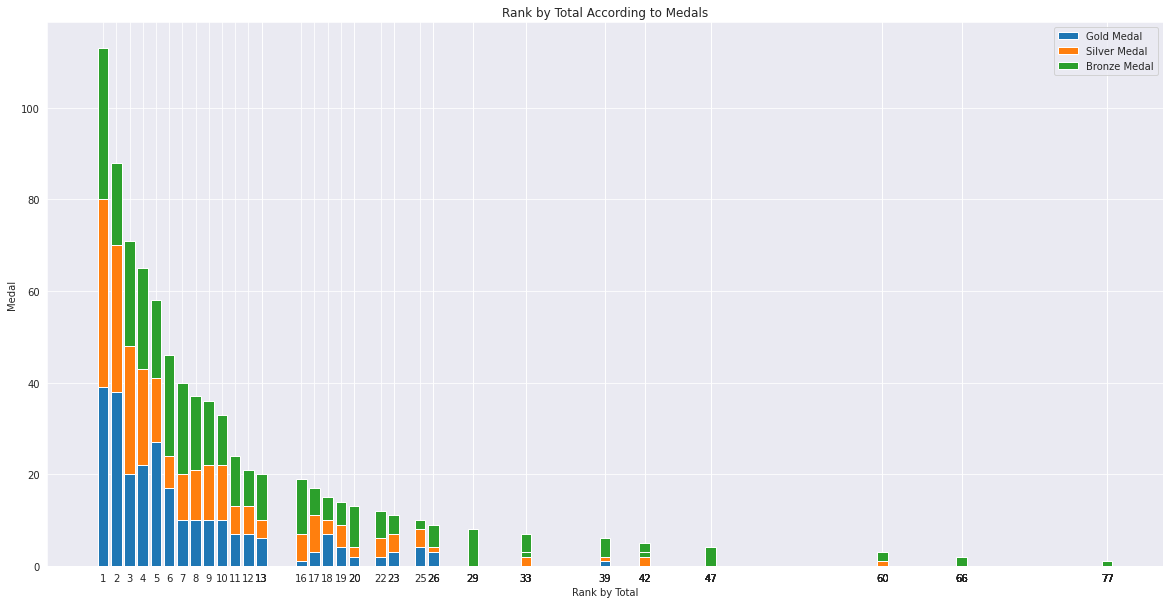

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
sns.set_style('darkgrid')
p1 = ax.bar(df['Rank by Total'], df['Gold Medal'], label='Gold Medal')
p2 = ax.bar(df['Rank by Total'], df['Silver Medal'],bottom=df['Gold Medal'], label='Silver Medal')
p3 = ax.bar(df['Rank by Total'], df['Bronze Medal'],bottom=df['Gold Medal'] + df['Silver Medal'], label='Bronze Medal')

ax.set_ylabel('Medal')
ax.set_xlabel('Rank by Total')

ax.set_xticks(df['Rank by Total'])
ax.legend()

ax.set_title('Rank by Total According to Medals')
# ax.bar_label(p1, label_type='center')
# ax.bar_label(p2, label_type='center')
# ax.bar_label(p3, label_type='center')
plt.savefig('foo.png')
plt.show()

AttributeError: ignored

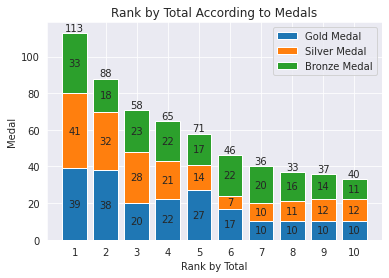

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))
sns.set_style('darkgrid')
p1 = ax.bar(top_10_total['Rank by Total'], top_10_total['Gold Medal'], label='Gold Medal')
p2 = ax.bar(top_10_total['Rank by Total'], top_10_total['Silver Medal'],bottom=top_10_total['Gold Medal'], label='Silver Medal')
p3 = ax.bar(top_10_total['Rank by Total'], top_10_total['Bronze Medal'],bottom=top_10_total['Gold Medal'] + top_10_total['Silver Medal'], label='Bronze Medal')

ax.set_ylabel('Medal')
ax.set_xlabel('Rank by Total')

ax.set_xticks(top_10_total['Rank by Total'])
ax.legend()

ax.set_title('Rank by Total According to Medals')
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p3, label_type='center')
ax.bar_label(p3, labels = df['Total'])
plt.savefig('foo.png')
plt.show()

In [ ]:
country = pd.read_csv('Country.csv', index_col = 0)

In [ ]:
country

,Country,Income group,Rank,Gold Medal,Silver Medal,Bronze Medal,Total,Rank by Total,PopTotal,Mean GNI
0,United States,High income,1,39,41,33,113,1,329064.917,56499.000000
1,China,Upper middle income,2,38,32,18,88,2,1433783.692,7740.909091
2,Japan,High income,3,27,14,17,58,5,126860.299,42995.000000
3,United Kingdom,High income,4,22,21,22,65,4,67530.161,42405.000000
4,Australia,High income,6,17,7,22,46,6,25203.200,56050.000000
...,...,...,...,...,...,...,...,...,...,...
77,Ghana,Lower middle income,86,0,0,1,1,77,30417.858,1829.090909
78,Cote d'Ivoire,Lower middle income,86,0,0,1,1,77,25716.554,1691.818182
79,Botswana,Upper middle income,86,0,0,1,1,77,2303.703,6935.454545
80,Burkina Faso,Low income,86,0,0,1,1,77,20321.383,723.636364


In [ ]:
country['Income group'].value_counts()

High income            36
Upper middle income    29
Lower middle income    13
Low income              3
Name: Income group, dtype: int64

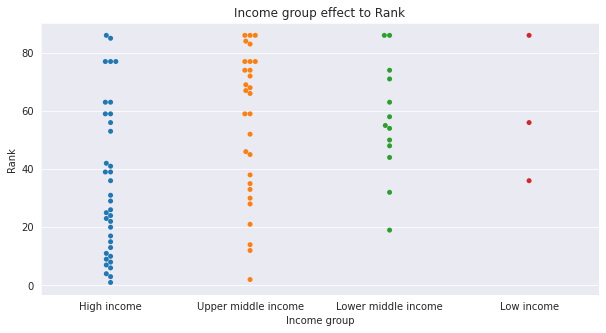

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
sns.swarmplot(x = 'Income group', y = 'Rank', data = country)
plt.title('Income group effect to Rank')
plt.show()

In [ ]:
country.columns

Index(['Country', 'Income group', 'Rank', 'Gold Medal', 'Silver Medal',
       'Bronze Medal', 'Total', 'Rank by Total', 'PopTotal', 'Mean GNI'],
      dtype='object')

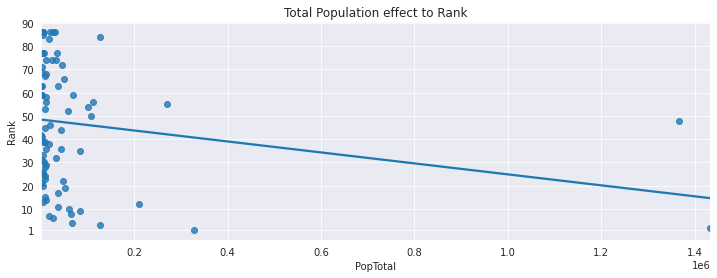

In [ ]:
fig, ax = plt.subplots(figsize = (12,4))
sns.regplot(x = 'PopTotal', y = 'Rank', data = country, ci=None)
plt.title('Total Population effect to Rank')
ticks = [1,10,20,30,40,50,60,70,80,90]
ax.set_yticks(ticks)
plt.show()

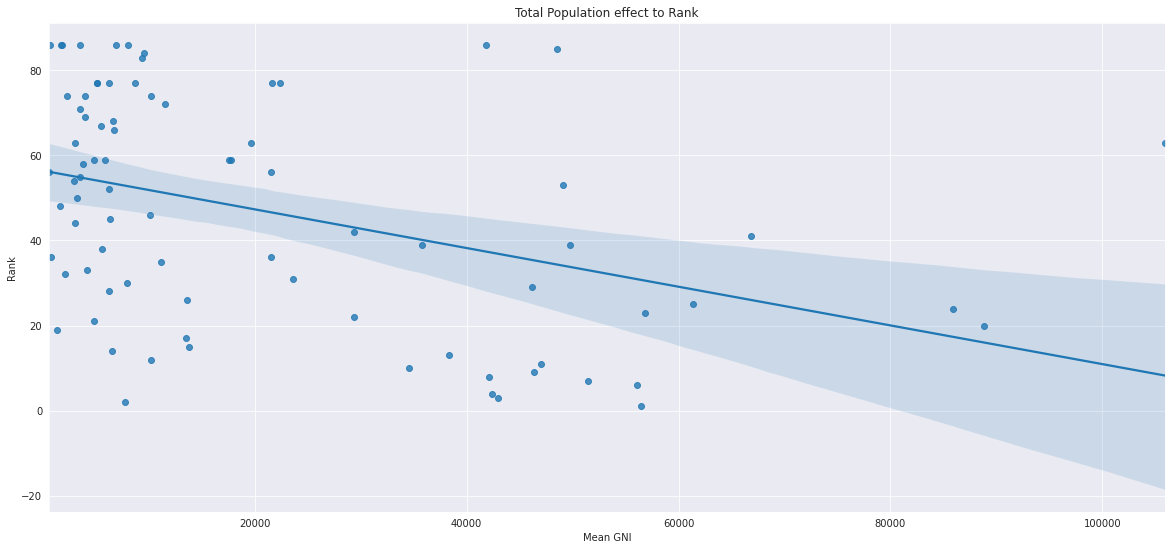

In [ ]:
fig, ax = plt.subplots(figsize = (20,9))
sns.regplot(x = 'Mean GNI', y = 'Rank', data = country)
plt.title('Total Population effect to Rank')
plt.show()

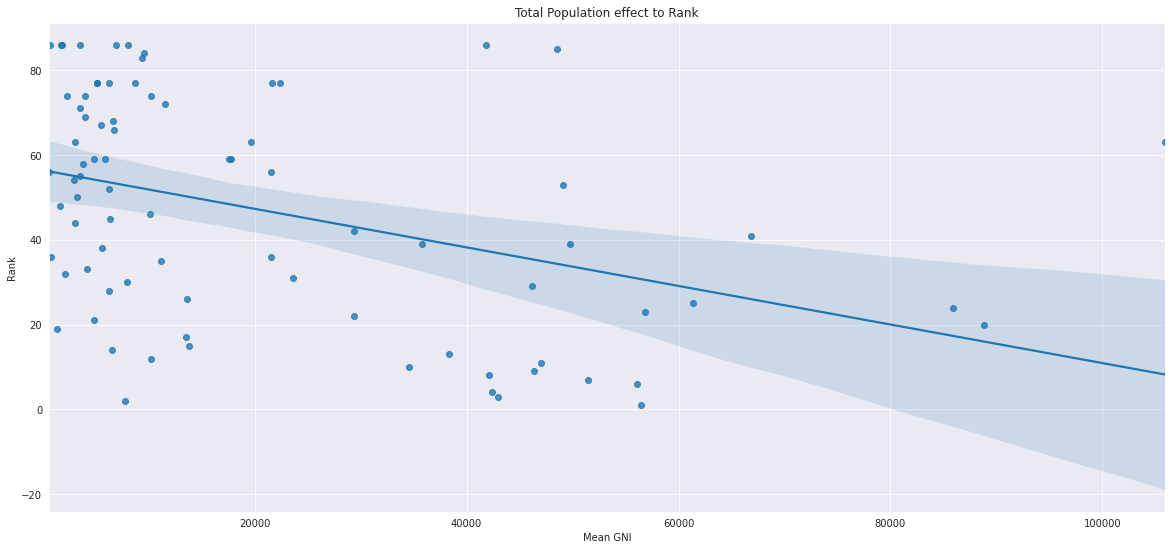

In [ ]:
fig, ax = plt.subplots(figsize = (20,9))
sns.regplot(x = 'Mean GNI', y = 'Rank', data = country)
plt.title('Total Population effect to Rank')
plt.show()